In [1]:
import numpy as np


cam1_fr_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_10_04/20240916V1r2/videos/Camera1/frametimes.npy'
cam5_fr_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_10_04/20240916V1r2/videos/Camera5/frametimes.npy'

cam1 = np.load(cam1_fr_path)
cam5 = np.load(cam5_fr_path)

In [1]:
import numpy as np

# Define base path and date/animal specific part of the folder structure
base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_10_04/20240916V1r2/videos'
camera_paths = [f"{base_path}/Camera{i}/frametimes.npy" for i in range(1, 7)]

# Load all cameras' frametimes
cameras = [np.load(path) for path in camera_paths]

# Print the shape of cam1[0] for each camera and find the maximum across all
for i, cam in enumerate(cameras, start=1):
    print(f"cam{i}[0] shape:", cam[0].shape)

# Find the maximum value across all cameras
max_value = max(cam.max() for cam in cameras)
print("Maximum value across all cameras:", max_value)


cam1[0] shape: (2535,)
cam2[0] shape: (2530,)
cam3[0] shape: (2530,)
cam4[0] shape: (2532,)
cam5[0] shape: (2567,)
cam6[0] shape: (2530,)
Maximum value across all cameras: 2567.0


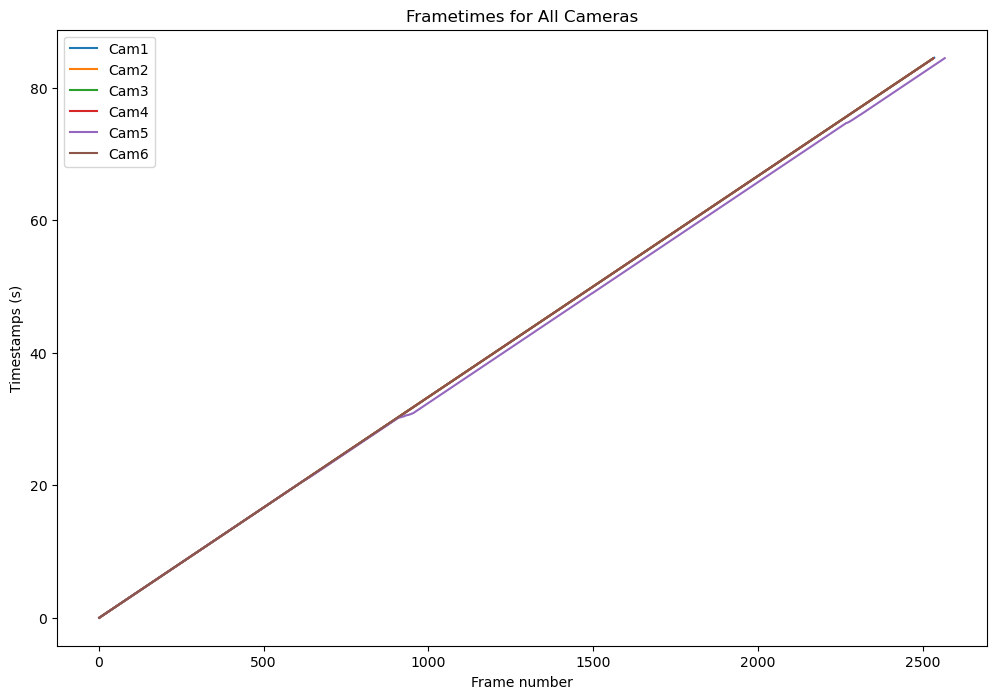

In [2]:
import matplotlib.pyplot as plt

# Plotting the data for all cameras
plt.figure(figsize=(12, 8))

# Loop through each camera and plot its data
for i, cam in enumerate(cameras, start=1):
    plt.plot(cam[0], cam[1], label=f"Cam{i}")

# Adding labels and title
plt.xlabel("Frame number")
plt.ylabel("Timestamps (s)")
plt.title("Frametimes for All Cameras")
plt.legend()

plt.show()


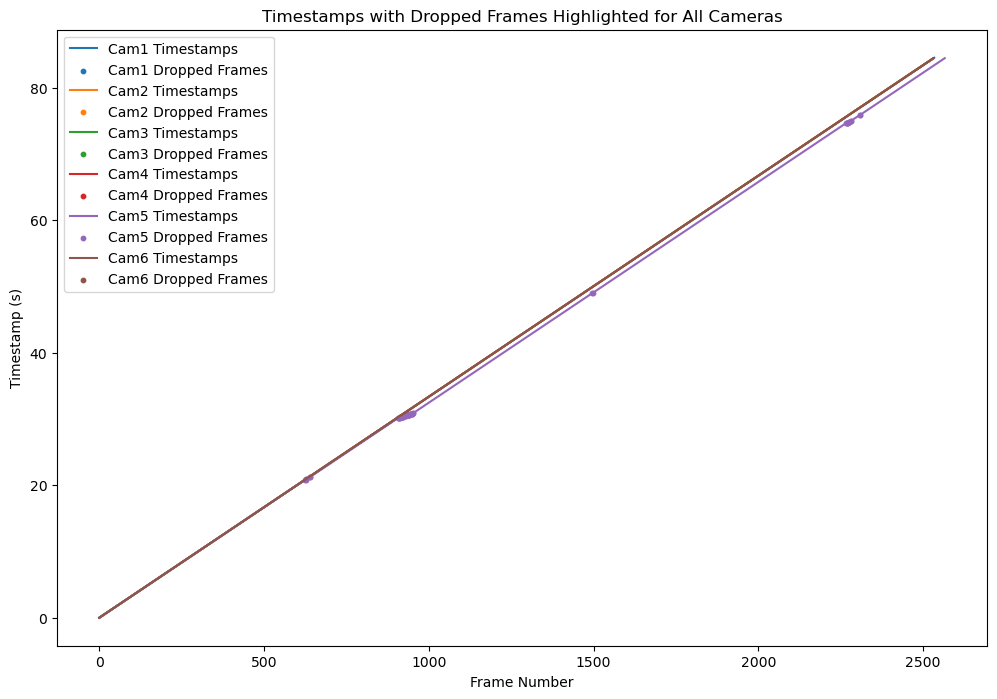

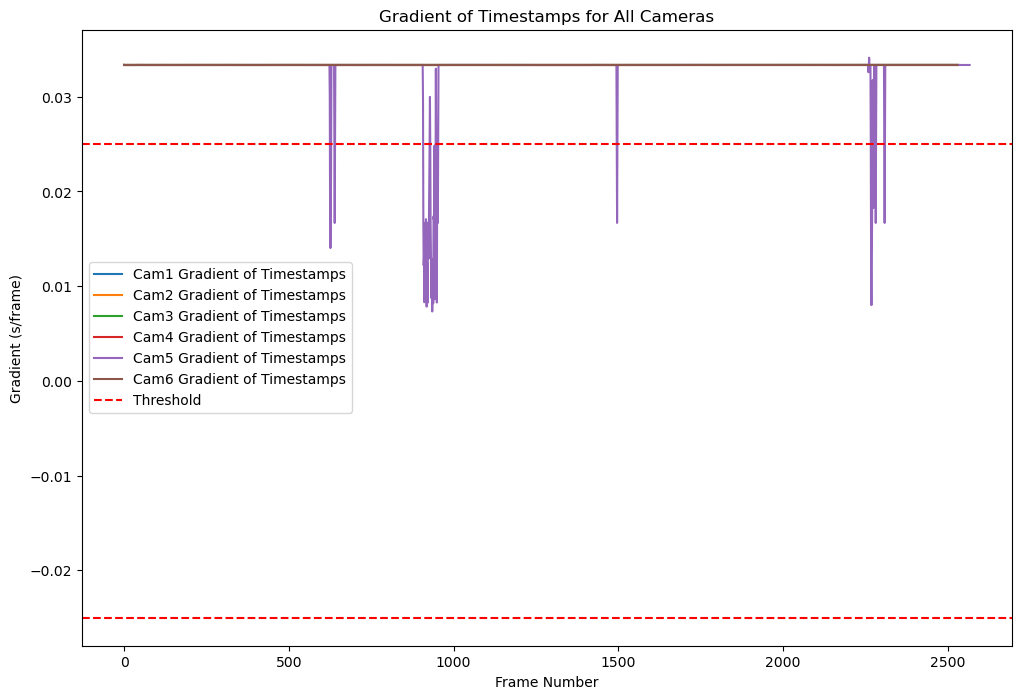

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set a threshold for detecting plateaus
threshold = 0.025  # Adjust based on observed gradient values

# Plot for timestamps with dropped frames for all cameras
plt.figure(figsize=(12, 8))
for i, cam in enumerate(cameras, start=1):
    timestamps = cam[1]
    gradients = np.gradient(timestamps)
    dropped_frame_indices = np.where(np.abs(gradients) < threshold)[0]
    
    # Plot timestamps
    plt.plot(timestamps, label=f'Cam{i} Timestamps')
    # Highlight dropped frames
    plt.scatter(dropped_frame_indices, timestamps[dropped_frame_indices], s=10, label=f'Cam{i} Dropped Frames')
    
plt.xlabel('Frame Number')
plt.ylabel('Timestamp (s)')
plt.legend()
plt.title('Timestamps with Dropped Frames Highlighted for All Cameras')
plt.show()

# Plot for gradients for all cameras
plt.figure(figsize=(12, 8))
for i, cam in enumerate(cameras, start=1):
    timestamps = cam[1]
    gradients = np.gradient(timestamps)
    
    # Plot gradients
    plt.plot(gradients, label=f'Cam{i} Gradient of Timestamps')
    
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.xlabel('Frame Number')
plt.ylabel('Gradient (s/frame)')
plt.legend()
plt.title('Gradient of Timestamps for All Cameras')
plt.show()


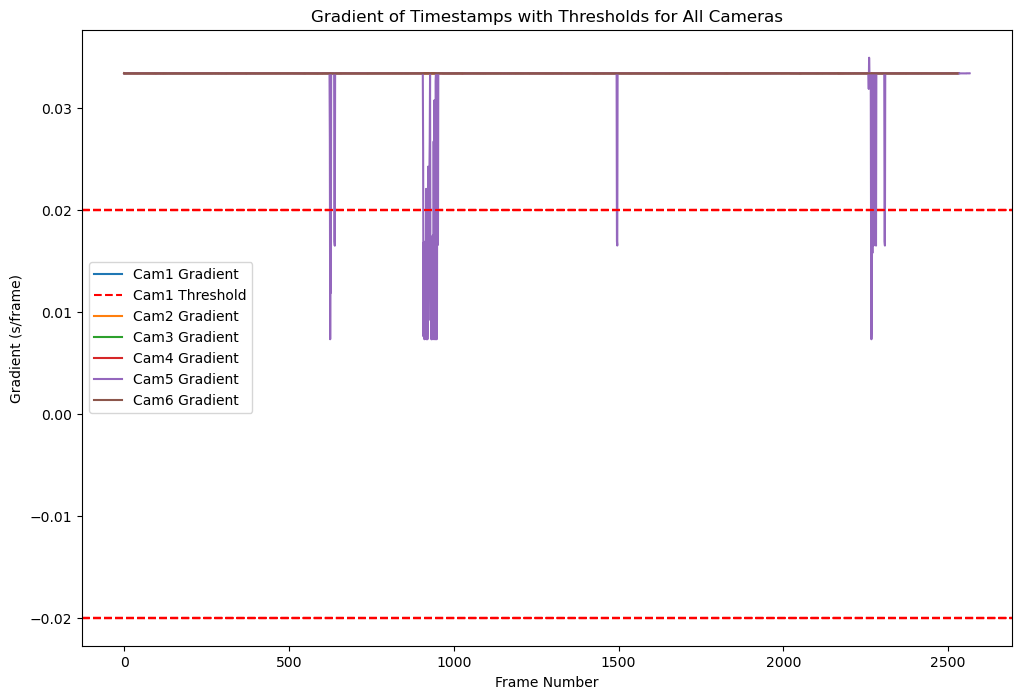

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Plot setup for gradients across all cameras
plt.figure(figsize=(12, 8))

# Loop through each camera to calculate and plot the gradient with threshold
for i, cam in enumerate(cameras, start=1):
    timestamps = cam[1]  # Assuming timestamps are in cam[1] for each camera
    
    # Calculate the gradient of timestamps
    gradients = np.diff(timestamps)
    
    # Calculate dynamic threshold based on mean and standard deviation of the gradients
    threshold = 0.02 #np.mean(gradients) + 0.5 * np.std(gradients)
    
    # Plot the gradient for the current camera
    plt.plot(gradients, label=f'Cam{i} Gradient')
    
    # Plot the positive and negative threshold lines
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Cam{i} Threshold' if i == 1 else "")
    plt.axhline(y=-threshold, color='red', linestyle='--')

# Plot formatting
plt.xlabel('Frame Number')
plt.ylabel('Gradient (s/frame)')
plt.legend()
plt.title('Gradient of Timestamps with Thresholds for All Cameras')
plt.show()


In [3]:
import numpy as np
from scipy.io import loadmat

# Paths to the .mat files
cam1_fr_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_10_04/20240916V1r2/videos/Camera1/frametimes.mat'
cam5_fr_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_10_04/20240916V1r2/videos/Camera5/frametimes.mat'

# Load the .mat files
cam1_data = loadmat(cam1_fr_path)
cam5_data = loadmat(cam5_fr_path)


KeyError: 'frametimes'

In [4]:
cam1_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Fri Oct  4 15:25:16 2024',
 '__version__': '1.0',
 '__globals__': [],
 'frameNumber': array([[   1,    2,    3, ..., 2533, 2534, 2535]], dtype=int32),
 'timeStamp': array([[0.00000000e+00, 3.33511840e-02, 6.67024560e-02, ...,
         8.44433212e+01, 8.44766686e+01, 8.45100198e+01]])}

In [6]:
cam1

array([[1.00000000e+00, 2.00000000e+00, 3.00000000e+00, ...,
        2.53300000e+03, 2.53400000e+03, 2.53500000e+03],
       [0.00000000e+00, 3.33511840e-02, 6.67024560e-02, ...,
        8.44433212e+01, 8.44766686e+01, 8.45100198e+01]])

In [2]:
cam1[1]

array([0.00000000e+00, 3.33511840e-02, 6.67024560e-02, ...,
       8.44433212e+01, 8.44766686e+01, 8.45100198e+01])

In [3]:
cam5[1]

array([0.00000000e+00, 3.33434560e-02, 6.66947040e-02, ...,
       8.43763292e+01, 8.44096728e+01, 8.44430239e+01])

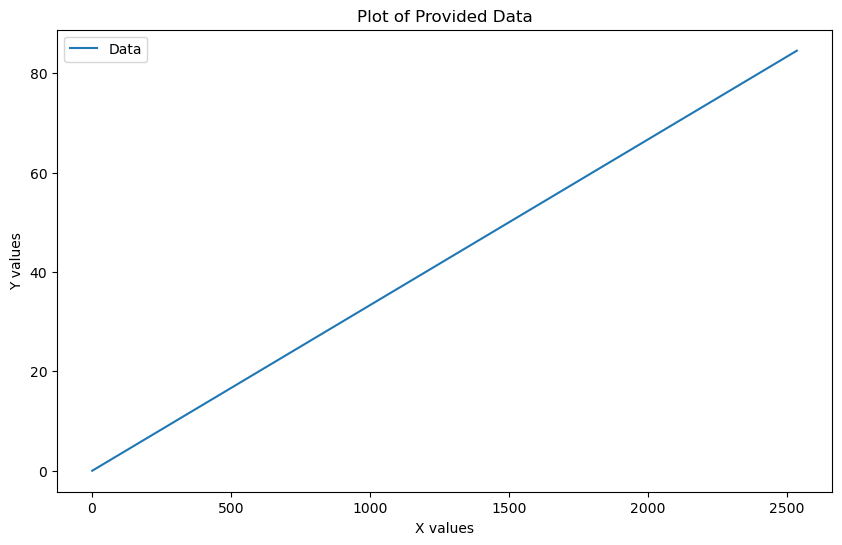

In [3]:
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(cam1[0], cam1[1], label="Data")

# Adding labels and title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plot of Provided Data")
plt.legend()

plt.show()

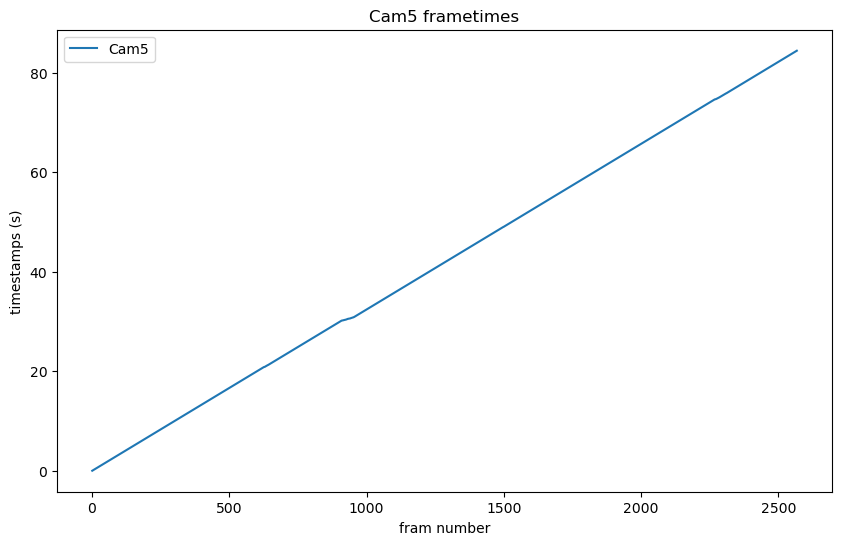

In [8]:
import matplotlib.pyplot as plt
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(cam5[0], cam5[1], label="Cam5")

# Adding labels and title
plt.xlabel("frame number")
plt.ylabel("timestamps (s)")
plt.title("Cam5 frametimes")
plt.legend()

plt.show()

In [20]:
cam1_framenumbers = cam1[0]
cam1_timestamps = cam1[1]
cam5_timestamps = cam5[1]


In [21]:
cam5_timestamps.shape

(2567,)

In [24]:
cam1[0][-1]

2535.0

In [28]:
cam1[0].shape

(2535,)

In [25]:
cam1[1][-1]

84.51001975999952

In [29]:
cam1[1].shape

(2535,)

In [26]:
cam5[0][-1]

2567.0

In [30]:
cam5[0].shape

(2567,)

In [27]:
cam5[1][-1]

84.44302394400074

In [31]:
cam5[1].shape

(2567,)

In [22]:
cam1_timestamps.shape

(2535,)

Indices of dropped frames in cam5: [2260]
Number of dropped frames: 1


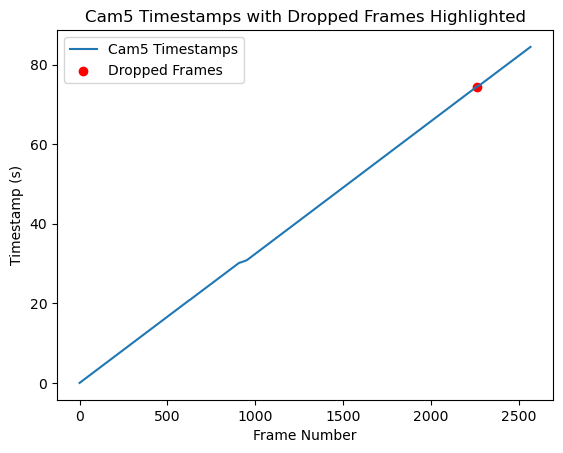

In [41]:
import numpy as np

# Assuming cam5_timestamps is your array of timestamps for cam5
cam5_timestamps = cam5[1]  # Replace with your actual timestamp data

# Calculate the difference between consecutive timestamps
timestamp_diffs = np.diff(cam5_timestamps)

# Set a threshold for detecting dropped frames
# You might need to adjust this based on your specific data characteristics
threshold = np.mean(timestamp_diffs) + 0.5*np.std(timestamp_diffs) 

# Find indices where the difference exceeds the threshold, indicating a possible dropped frame
dropped_frame_indices = np.where(timestamp_diffs > threshold)[0]

print("Indices of dropped frames in cam5:", dropped_frame_indices)
print("Number of dropped frames:", len(dropped_frame_indices))

# Optional: plot to visualize where dropped frames occur
import matplotlib.pyplot as plt

plt.plot(cam5_timestamps, label='Cam5 Timestamps')
plt.scatter(dropped_frame_indices, cam5_timestamps[dropped_frame_indices], color='red', label='Dropped Frames')
plt.xlabel('Frame Number')
plt.ylabel('Timestamp (s)')
plt.legend()
plt.title('Cam5 Timestamps with Dropped Frames Highlighted')
plt.show()


Indices of dropped frames in cam5 (based on gradient): [ 625  626  627  628  639  640  908  909  910  911  912  913  914  915
  916  917  918  919  920  921  922  923  924  925  926  929  930  931
  932  933  934  935  936  937  938  939  940  941  942  943  944  945
  948  949  950  952  953 1496 1497 2267 2268 2269 2270 2271 2274 2275
 2281 2282 2308 2309]
Number of dropped frames: 60


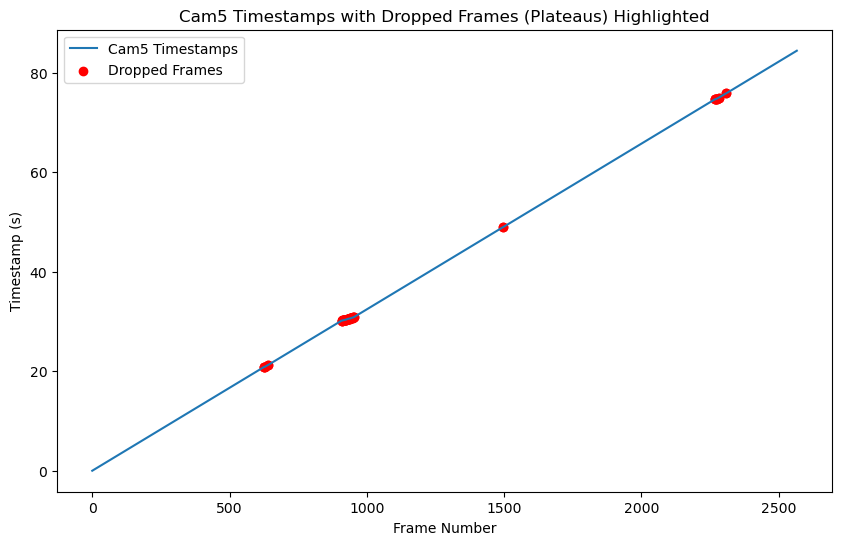

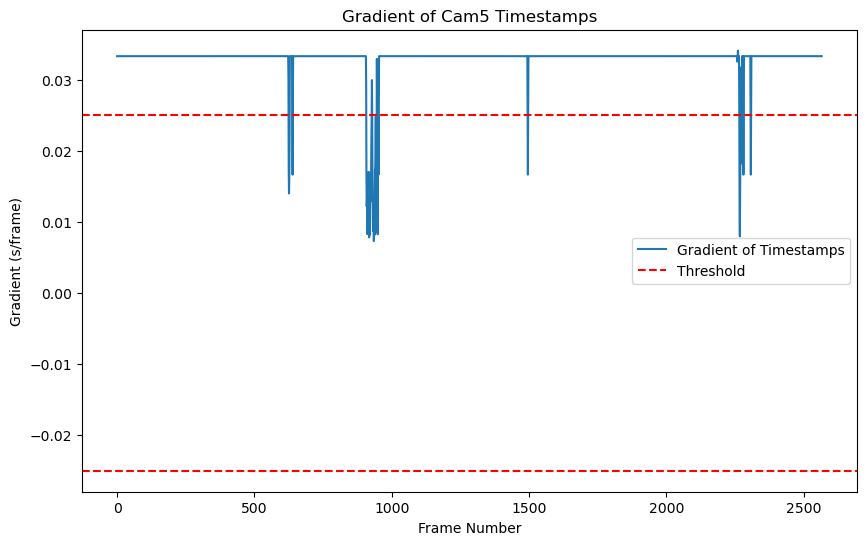

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming cam5_timestamps is your array of timestamps for cam5
cam5_timestamps = cam5[1]  # Replace with your actual timestamp data

# Calculate the gradient of the timestamps
gradients = np.gradient(cam5_timestamps)

# Set a threshold for detecting plateaus
# Values close to zero indicate regions where there was little to no change in timestamp
threshold = 0.025  # Adjust based on observed gradient values

# Identify indices where the gradient is below the threshold
dropped_frame_indices = np.where(np.abs(gradients) < threshold)[0]

print("Indices of dropped frames in cam5 (based on gradient):", dropped_frame_indices)
print("Number of dropped frames:", len(dropped_frame_indices))

# Plot the timestamps with marked dropped frame regions
plt.figure(figsize=(10, 6))
plt.plot(cam5_timestamps, label='Cam5 Timestamps')
plt.scatter(dropped_frame_indices, cam5_timestamps[dropped_frame_indices], color='red', label='Dropped Frames')
plt.xlabel('Frame Number')
plt.ylabel('Timestamp (s)')
plt.legend()
plt.title('Cam5 Timestamps with Dropped Frames (Plateaus) Highlighted')
plt.show()

# Optional: Plot the gradient to visualize flat regions
plt.figure(figsize=(10, 6))
plt.plot(gradients, label='Gradient of Timestamps')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.xlabel('Frame Number')
plt.ylabel('Gradient (s/frame)')
plt.legend()
plt.title('Gradient of Cam5 Timestamps')
plt.show()


In [32]:
# this does not work becuase 
# # Find timestamps in cam1 that are not in cam5 (i.e., dropped frames in cam5)
# dropped_frames = np.setdiff1d(cam1[1], cam5[1])

# print("Dropped frames in cam5:", dropped_frames)

Dropped frames in cam5: [3.33511840e-02 6.67024560e-02 1.00049744e-01 ... 8.44433212e+01
 8.44766686e+01 8.45100198e+01]
